<a href="https://colab.research.google.com/github/megha395/Pyspark/blob/main/Pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=b7242242eb1b9e76cccabd74e3394c58e298dad3359a57e25e491259945015a1
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [53]:
from pyspark.sql import SparkSession
from pyspark.ml.recommendation import ALS ## Alternating least squares (ALS) algorithm
from pyspark.ml.evaluation import RegressionEvaluator, BinaryClassificationEvaluator
from pyspark.ml.feature import StringIndexer, IndexToString, VectorAssembler
from matplotlib import pyplot as plt
import seaborn as sns
from pyspark.sql.functions import mean,col,split, col, regexp_extract, when, lit
from pyspark.ml import Pipeline

from pyspark.ml.classification import LogisticRegression
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit, CrossValidator
from sklearn.metrics import roc_curve, auc
from pyspark import SparkContext
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric

In [ ]:
## Create session
spark = SparkSession.builder.appName('recommender_system').getOrCreate()

In [ ]:
## Load the dataset and create spark dataframe
df = spark.read.csv('/content/movie_ratings_df.csv', inferSchema=True, header=True)

# Using limit(), or select() or show() to view the data.
# Using toPandas() method to return Pyspark DataFrame as Pandas table

df.limit(5).toPandas()

,userId,title,rating
0,196,Kolya (1996),3
1,63,Kolya (1996),3
2,226,Kolya (1996),5
3,154,Kolya (1996),3
4,306,Kolya (1996),5


Our task: given a user, we predict and return a list of movies recommendation for that user to watch.


use: printSchema() to quick overview of features datatype

In [ ]:
df.printSchema()

root
 |-- userId: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- rating: integer (nullable = true)



# Movie Recommendation with Pyspark

 The title column is stored as string type. To work with pyspark Mlib library, we need to convert string type to numeric values.

In [ ]:
stringIndexer = StringIndexer(inputCol = 'title', outputCol = 'title_new')
# Applying stringindexer object on dataframe movie title column
model = stringIndexer.fit(df)
#creating new dataframe with transformed values
indexed = model.transform(df)

In [ ]:
# validate the numerical title values
indexed.limit(5).toPandas()

,userId,title,rating,title_new
0,196,Kolya (1996),3,287.0
1,63,Kolya (1996),3,287.0
2,226,Kolya (1996),5,287.0
3,154,Kolya (1996),3,287.0
4,306,Kolya (1996),5,287.0


from matplotlib import pyplot as plt
_df_0['userId'].plot(kind='hist', bins=20, title='userId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='userId', y='rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['title_new']
  ys = series['userId']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('title_new', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('title_new')
_ = plt.ylabel('userId')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['title_new']
  ys = series['rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('title_new', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('title_new')
_ = plt.ylabel('rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['title_new']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'title_new'}, axis=1)
              .sort_values('title_new', ascending=True))
  xs = counted['title_new']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('title_new', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('title_new')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['userId'].plot(kind='line', figsize=(8, 4), title='userId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

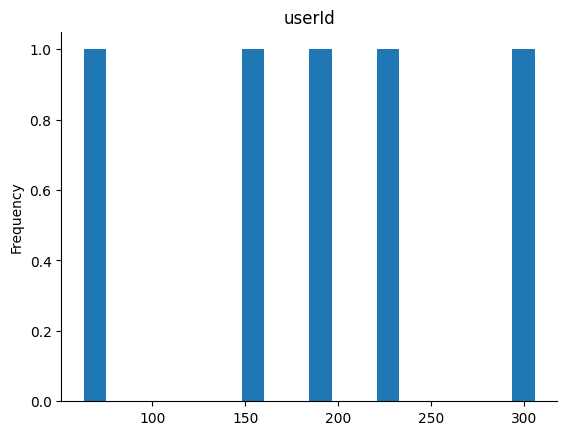

In [ ]:
_df_0['userId'].plot(kind='hist', bins=20, title='userId')
plt.gca().spines[['top', 'right',]].set_visible(False)

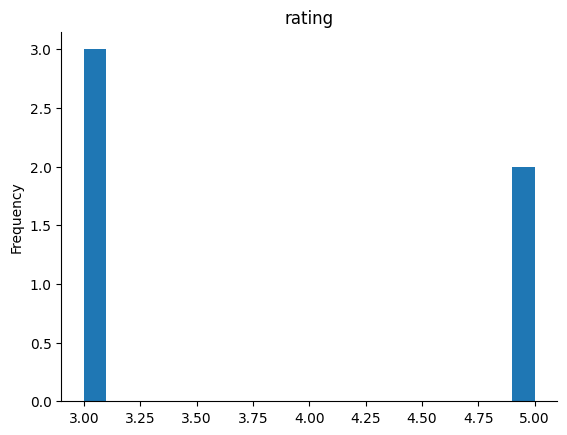

In [ ]:
from matplotlib import pyplot as plt
_df_1['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

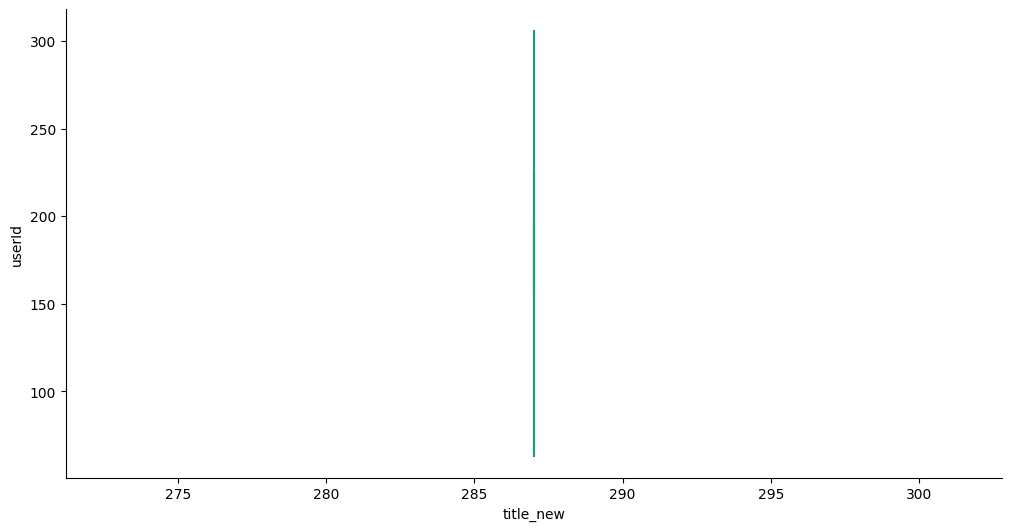

In [ ]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['title_new']
  ys = series['userId']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('title_new', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('title_new')
_ = plt.ylabel('userId')

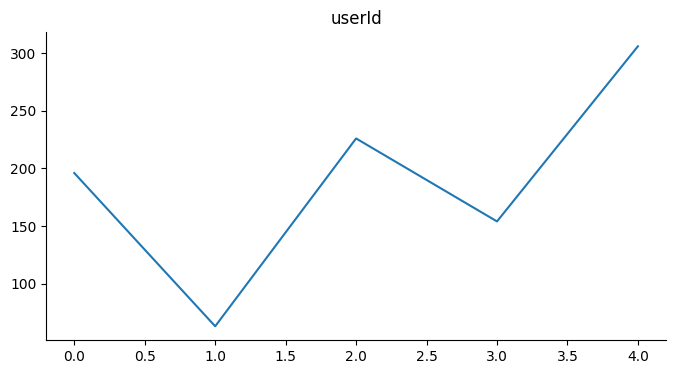

In [ ]:
_df_6['userId'].plot(kind='line', figsize=(8, 4), title='userId')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
indexed.describe().show()

+-------+------------------+--------------------+------------------+-----------------+
|summary|            userId|               title|            rating|        title_new|
+-------+------------------+--------------------+------------------+-----------------+
|  count|            100000|              100000|            100000|           100000|
|   mean|         462.48475|                NULL|           3.52986|        309.19962|
| stddev|266.61442012750865|                NULL|1.1256735991443156|299.6417933865364|
|    min|                 1|'Til There Was Yo...|                 1|              0.0|
|    max|               943|� k�ldum klaka (C...|                 5|           1663.0|
+-------+------------------+--------------------+------------------+-----------------+



In [ ]:
## Split data into train and test set
train, test = indexed.randomSplit([0.7, 0.3], seed=42)

In [ ]:
## Train the recommender model using train data
rec = ALS(userCol='userId',
          itemCol='title_new',
          ratingCol='rating',
          coldStartStrategy='drop',
          nonnegative=True,
          maxIter=10,
          regParam=0.01)

In [ ]:
## Fit the model on train set
rec_model = rec.fit(train)

In [ ]:
## prediction on test set
predicted_ratings = rec_model.transform(test)

In [ ]:
predicted_ratings.toPandas()

,userId,title,rating,title_new,prediction
0,148,"Abyss, The (1989)",4,200.0,2.916862
1,148,Amadeus (1984),1,50.0,4.664257
2,148,Babe (1995),4,96.0,4.887962
3,148,Being There (1979),5,290.0,5.887266
4,148,Blade Runner (1982),5,52.0,4.360748
...,...,...,...,...,...
29966,517,Liar Liar (1997),1,4.0,3.117307
29967,517,Star Trek III: The Search for Spock (1984),3,164.0,3.951685
29968,517,Tin Cup (1996),2,125.0,2.392839
29969,517,Toy Story (1995),3,7.0,3.928239


In [ ]:
## Evaluation
evaluator = RegressionEvaluator(metricName = 'rmse',
                                predictionCol = 'prediction',
                                labelCol = 'rating')

In [ ]:
rmse = evaluator.evaluate(predicted_ratings)

In [ ]:
print(rmse)

1.0402046011599784


After training, now is the time to recommend top movies which user might like.

In [ ]:
## Create dataset of all unique movies
unique_movies = indexed.select('title_new').distinct()

In [ ]:
## Create function to recommend top 'n' movies to any particular user
def top_movies(user_id, n):
  '''
  Function to recommend top n movies that user has not seen yet but might like.
  '''

  a = unique_movies.alias('a')
  watched_movies = indexed.filter(indexed['userId'] == user_id).select('title_new')
  b = watched_movies.alias('b')
  total_movies = a.join(b, a.title_new == b.title_new, how = 'left')
  remaining_movies = total_movies.where(col("b.title_new").isNull()).select(a.title_new).distinct()

  remaining_movies = remaining_movies.withColumn("userId", lit(int(user_id)))

  recommendations = rec_model.transform(remaining_movies).orderBy('prediction', ascending = False).limit(n)

  movie_title = IndexToString(inputCol='title_new', outputCol='title', labels=model.labels)
  final_recommendations = movie_title.transform(recommendations)

  return final_recommendations.show(n, False)

In [ ]:
top_movies(60, 5)

+---------+------+----------+--------------------------------------+
|title_new|userId|prediction|title                                 |
+---------+------+----------+--------------------------------------+
|1283.0   |60    |6.1861076 |Secret Agent, The (1996)              |
|1289.0   |60    |6.075552  |World of Apu, The (Apur Sansar) (1959)|
|1103.0   |60    |6.055692  |Stalker (1979)                        |
|1517.0   |60    |6.0324683 |Slingshot, The (1993)                 |
|1277.0   |60    |5.932934  |Mina Tannenbaum (1994)                |
+---------+------+----------+--------------------------------------+



# Classification model in Pyspark

## EDA in Pyspark

In [6]:
## Create spark session
spark = SparkSession.builder.appName('Play  with pyspark ML on titanic_datset').getOrCreate()

In [7]:
## load csv data
df = spark.read.csv("/content/train.csv", header = 'True', inferSchema = 'True')

In [8]:
df.limit(5).toPandas()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S


In [9]:
df.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



In [10]:
pandas_df = df.toPandas()

<ipython-input-11-5e8b04003f6e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pandas_df['Age'])


<Axes: title={'center': 'Age distribution among all passengers'}, xlabel='Age', ylabel='Density'>

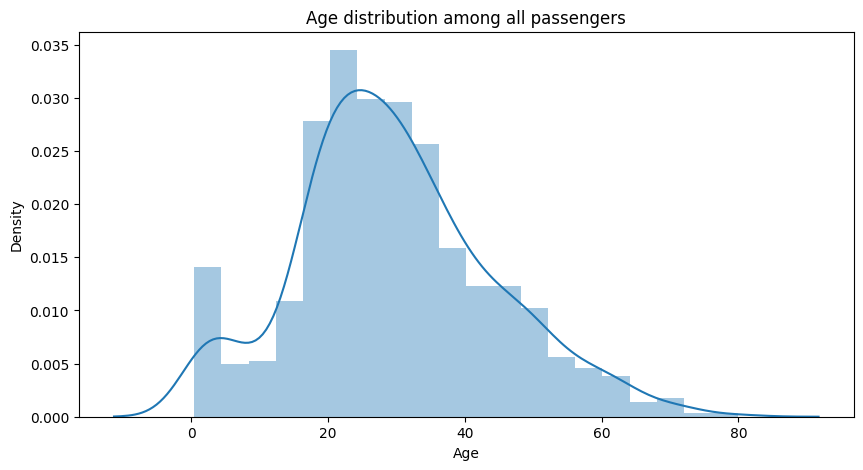

In [11]:
plt.figure(figsize=(10,5))
plt.title('Age distribution among all passengers')
sns.distplot(pandas_df['Age'])

In [12]:
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|          0|       0|     0|   0|  0|177|    0|    0|     0|   0|  687|       2|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+



In [13]:
df = df.drop('Cabin')

In [14]:
df = df.withColumn("Initial", regexp_extract(col("Name"), "([A-Za-z]+)\.",1))

In [15]:
df.limit(3).toPandas()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss


In [16]:
## Replace misspelled initials with correct
df = df.replace(['Mlle','Mme', 'Ms', 'Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr',  'Mrs',  'Mrs',  'Other',  'Other','Other','Mr','Mr','Mr'])


In [17]:
df.groupby('Initial').avg('Age').collect()

[Row(Initial='Miss', avg(Age)=21.86),
 Row(Initial='Other', avg(Age)=45.888888888888886),
 Row(Initial='Master', avg(Age)=4.574166666666667),
 Row(Initial='Mr', avg(Age)=32.73960880195599),
 Row(Initial='Mrs', avg(Age)=35.981818181818184)]

In [18]:
## Assigning missing values in age feature based on their age of initials

df = df.withColumn("Age", when((df["Initial"] == 'Miss') & (df['Age'].isNull()), 22).otherwise(df['Age']))

In [19]:
df = df.withColumn("Age", when((df["Initial"] == "Other") & (df["Age"].isNull()), 46).otherwise(df["Age"]))

In [20]:
df = df.withColumn("Age", when((df["Initial"] == "Mrs") & (df["Age"].isNull()), 36).otherwise(df["Age"]))

In [21]:
df = df.withColumn("Age", when((df["Initial"] == "Mr") & (df["Age"].isNull()), 33).otherwise(df["Age"]))

In [22]:
df = df.withColumn("Age", when((df["Initial"] == "Master") & (df["Age"].isNull()), 5).otherwise(df["Age"]))

In [23]:
## Checking Embark column that has 2 missing values
df.groupBy("Embarked").count().show()

+--------+-----+
|Embarked|count|
+--------+-----+
|       Q|   77|
|    NULL|    2|
|       C|  168|
|       S|  644|
+--------+-----+



In [24]:
## Fill by majority frequency value
df = df.fillna({"Embarked" : 'S'})

In [25]:
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+-----------+--------+------+----+---+---+-----+-----+------+----+--------+-------+
|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Embarked|Initial|
+-----------+--------+------+----+---+---+-----+-----+------+----+--------+-------+
|          0|       0|     0|   0|  0|  0|    0|    0|     0|   0|       0|      0|
+-----------+--------+------+----+---+---+-----+-----+------+----+--------+-------+



# Feature Engineering

In [26]:
## Create new Family_size column
df = df.withColumn("Family_Size", col('SibSp') + col('Parch'))

In [27]:
df = df.withColumn('Alone', lit(0)) ## Create a column named Alone

In [28]:
df = df.withColumn("Alone", when(df['Family_Size'] == 0, 1).otherwise(df["Alone"]))

In [29]:
indexers = [StringIndexer(inputCol=column, outputCol= column + "_index").fit(df) for column in ['Sex', 'Embarked', 'Initial']]

In [30]:
pipeline = Pipeline(stages=indexers)

In [31]:
df = pipeline.fit(df).transform(df)

In [32]:
df.limit(3).toPandas()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Initial,Family_Size,Alone,Sex_index,Embarked_index,Initial_index
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1,0,0.0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1,0,1.0,1.0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0,1,1.0,0.0,1.0


Selecting features for training

In [33]:
df = df.drop("PassengerId", "Name", "Ticket", "Parch", "Embarked", "Sex", "Initial")

In [34]:
df.limit(5).toPandas()

,Survived,Pclass,Age,SibSp,Fare,Family_Size,Alone,Sex_index,Embarked_index,Initial_index
0,0,3,22.0,1,7.2500,1,0,0.0,0.0,0.0
1,1,1,38.0,1,71.2833,1,0,1.0,1.0,2.0
2,1,3,26.0,0,7.9250,0,1,1.0,0.0,1.0
3,1,1,35.0,1,53.1000,1,0,1.0,0.0,2.0
4,0,3,35.0,0,8.0500,0,1,0.0,0.0,0.0


Converting selected features to vector

In [35]:
feature = VectorAssembler(inputCols = df.columns[1:], outputCol= "features")
feature_vector = feature.transform(df)
feature_vector.limit(3).toPandas()

,Survived,Pclass,Age,SibSp,Fare,Family_Size,Alone,Sex_index,Embarked_index,Initial_index,features
0,0,3,22.0,1,7.2500,1,0,0.0,0.0,0.0,"[3.0, 22.0, 1.0, 7.25, 1.0, 0.0, 0.0, 0.0, 0.0]"
1,1,1,38.0,1,71.2833,1,0,1.0,1.0,2.0,"[1.0, 38.0, 1.0, 71.2833, 1.0, 0.0, 1.0, 1.0, ..."
2,1,3,26.0,0,7.9250,0,1,1.0,0.0,1.0,"[3.0, 26.0, 0.0, 7.925, 0.0, 1.0, 1.0, 0.0, 1.0]"


In [36]:
train_df, test_df = feature_vector.randomSplit([0.7, 0.3], seed = 42)

In [37]:
train_df.printSchema()

root
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Family_Size: integer (nullable = true)
 |-- Alone: integer (nullable = false)
 |-- Sex_index: double (nullable = false)
 |-- Embarked_index: double (nullable = false)
 |-- Initial_index: double (nullable = false)
 |-- features: vector (nullable = true)



# Machine Learning in pyspark

In [38]:
## Taking features column for training and 'Survived' as target
titanic_df = feature_vector.select(['features', 'Survived'])

In [39]:
train_df, test_df = titanic_df.randomSplit([0.7, 0.3], seed = 42)

In [40]:
## algorithm
lr = LogisticRegression(labelCol = 'Survived')

## Grid Parameters defined
paramGrid = ParamGridBuilder().addGrid(lr.regParam, (0.01, 0.01))\
                              .addGrid(lr.maxIter, (5, 10))\
                              .addGrid(lr.tol, (1e-4, 1e-5))\
                              .addGrid(lr.elasticNetParam, (0.25, 0.75))\
                              .build()

In [43]:
## Define Cross Validation with Parameters
tvs = TrainValidationSplit(estimator = lr,
                           estimatorParamMaps=paramGrid,
                           evaluator=MulticlassClassificationEvaluator(labelCol='Survived'),
                           trainRatio=0.8
                          )

In [44]:
model = tvs.fit(train_df)

In [45]:
model_predictions = model.transform(test_df)

In [47]:
print('Accuracy: ', MulticlassClassificationEvaluator(labelCol = 'Survived', metricName = 'accuracy').evaluate(model_predictions))

Accuracy:  0.8017241379310345


In [49]:
print('Precision: ', MulticlassClassificationEvaluator(labelCol='Survived', metricName = 'weightedPrecision'). evaluate(model_predictions))

Precision:  0.7998811533294292


Evaluation of ROC Metric

In [55]:
sc = SparkContext.getOrCreate() # We need to create SparkContext
results = model_predictions.select(['probability', 'Survived'])

## score-label set
results_collect = results.collect()
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]
scoreAndLabels = sc.parallelize(results_list)
metrics = metric(scoreAndLabels)
print("The ROC score is: ", metrics.areaUnderROC)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


The ROC score is:  0.8537398373983739
